In [7]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
# Import DF

df = pd.read_csv('db2023_cleandf.csv')

# Adding a new column with integers from 1 to 479
df['ID'] = range(1, 480)

# Display the DataFrame
print(df)

                                               Comment                 Time  \
0    Posting a bit early so people know where to go...  2023-10-10 11:14:12   
1    20% fare reduction on public transport continu...  2023-10-10 13:55:05   
2                                        This is good.  2023-10-10 14:16:50   
3       Aaaaaahhhhh, what have the Greens done for us!  2023-10-10 16:56:05   
4    €67 million to provide 16,000 craft apprentice...  2023-10-10 14:18:04   
..                                                 ...                  ...   
474                                          [deleted]  2023-10-10 13:30:20   
475                                        You did not  2023-10-10 13:31:29   
476  Whats the 18 year old minimum wage rate going to?  2023-10-10 15:30:22   
477                                      10.16 I'd say  2023-10-10 15:33:48   
478  Yeah forgot its a set rate of 80% of minimum w...  2023-10-10 15:52:32   

     Score   ID  
0        1    1  
1       39    2

In [22]:
df.drop(columns=['Comment', 'Score'], inplace=True)

# Display the DataFrame after dropping the 'Comment' and 'Score' columns
print("\nDataFrame after dropping 'Comment' and 'Score' columns:")
print(df)



DataFrame after dropping 'Comment' and 'Score' columns:
                    Time   ID
0    2023-10-10 11:14:12    1
1    2023-10-10 13:55:05    2
2    2023-10-10 14:16:50    3
3    2023-10-10 16:56:05    4
4    2023-10-10 14:18:04    5
..                   ...  ...
474  2023-10-10 13:30:20  475
475  2023-10-10 13:31:29  476
476  2023-10-10 15:30:22  477
477  2023-10-10 15:33:48  478
478  2023-10-10 15:52:32  479

[479 rows x 2 columns]


In [24]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')

print(df)

                   Time   ID
0   2023-10-10 11:14:12    1
1   2023-10-10 13:55:05    2
2   2023-10-10 14:16:50    3
3   2023-10-10 16:56:05    4
4   2023-10-10 14:18:04    5
..                  ...  ...
474 2023-10-10 13:30:20  475
475 2023-10-10 13:31:29  476
476 2023-10-10 15:30:22  477
477 2023-10-10 15:33:48  478
478 2023-10-10 15:52:32  479

[479 rows x 2 columns]


In [26]:
df.set_index("Time", inplace=True)

In [27]:
df.head()

,ID
Time,
2023-10-10 11:14:12,1
2023-10-10 13:55:05,2
2023-10-10 14:16:50,3
2023-10-10 16:56:05,4
2023-10-10 14:18:04,5


In [64]:
df.tail()

,ID
Time,
2023-10-10 13:30:20,475
2023-10-10 13:31:29,476
2023-10-10 15:30:22,477
2023-10-10 15:33:48,478
2023-10-10 15:52:32,479


In [ ]:
df.plot 

In [ ]:
# Without using index



# dfr = df.sample("H" on "Time") 

# The above should resample hourly on the time column without having to index df

# M is month

 # T is minute

In [ ]:
# Resample our dataframe by Minute

dfrt = df.resample("T")

In [ ]:
dfrt = dfrt.count()
dfrt.head(12)

In [43]:
# Resample our dataframe by Hour

dfrh = df.resample("H")

In [44]:
dfrh = dfrh.count()
dfrh.head(12)

,ID
Time,
2023-10-10 11:00:00,14
2023-10-10 12:00:00,16
2023-10-10 13:00:00,86
2023-10-10 14:00:00,152
2023-10-10 15:00:00,60
2023-10-10 16:00:00,60
2023-10-10 17:00:00,22
2023-10-10 18:00:00,18
2023-10-10 19:00:00,13


<Axes: xlabel='Time'>

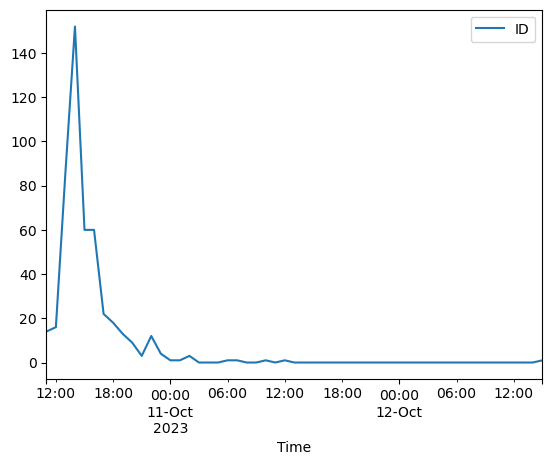

In [59]:
df.resample("H").count().plot(y='ID')

<Axes: xlabel='Time'>

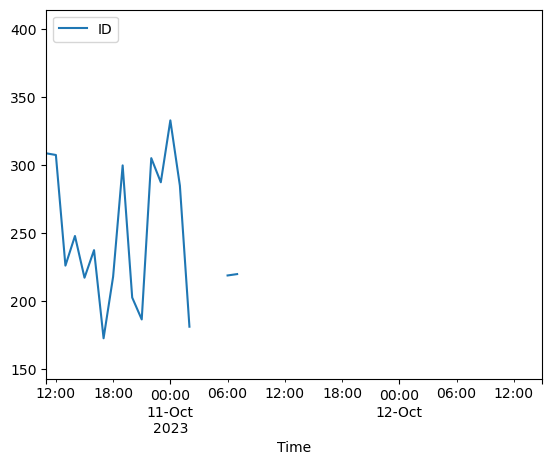

In [60]:
df.resample("H").mean().plot(y='ID')

<Axes: xlabel='Time'>

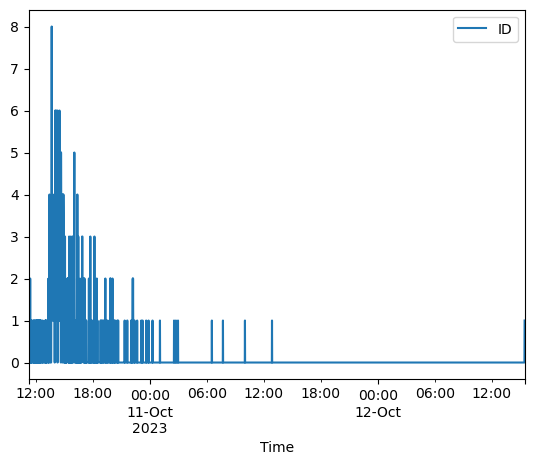

In [61]:
df.resample("T").count().plot(y='ID')

<Axes: xlabel='Time'>

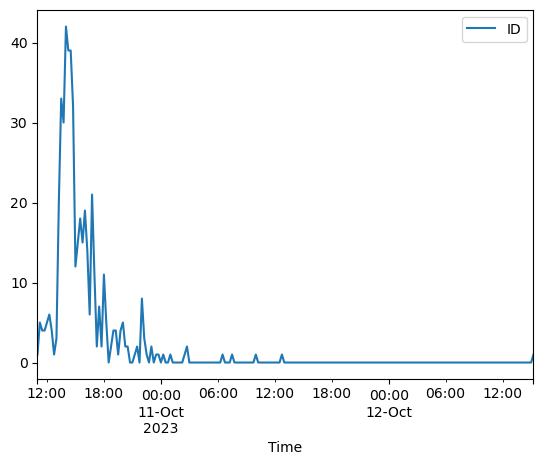

In [62]:
df.resample("15T").count().plot(y='ID')

<Axes: xlabel='Time'>

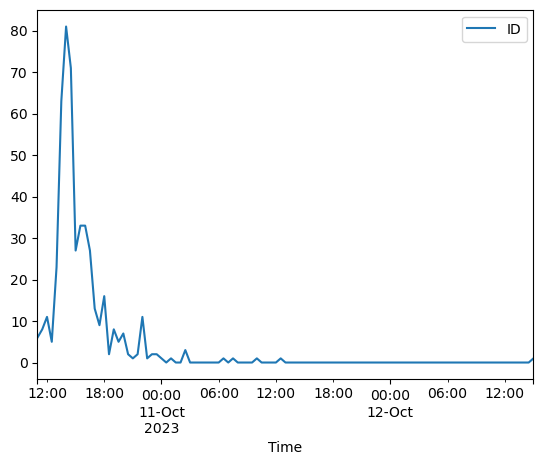

In [63]:
df.resample("30T").count().plot(y='ID')

<Axes: xlabel='Time'>

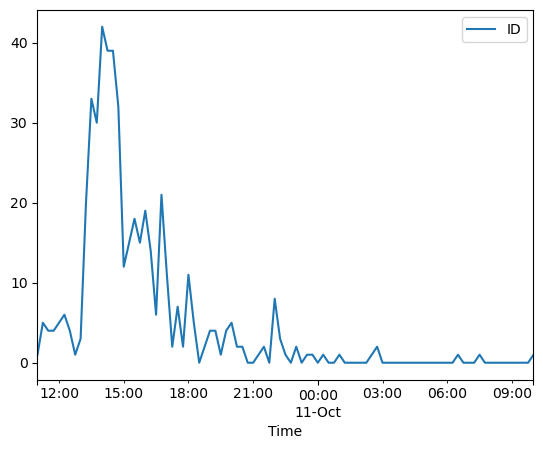

In [70]:
# Take the first 24 hours of our data 11am 10/10/2023 - 11am 11/10/2023

start_time = '2023-10-10 11:00:00'
end_time = '2023-10-11 11:00:00'

# Filter df for the specified time range
filtered_df = df[(df.index >= start_time) & (df.index <= end_time)]

# Resample at 15-minute intervals and plot
filtered_df.resample("15T").count().plot(y='ID')


In [71]:
# Resample for 30-minute intervals and save to a new DataFrame
resampled_df = df.resample("30T").count()

# Display the new DataFrame
print(resampled_df)

                     ID
Time                   
2023-10-10 11:00:00   6
2023-10-10 11:30:00   8
2023-10-10 12:00:00  11
2023-10-10 12:30:00   5
2023-10-10 13:00:00  23
...                  ..
2023-10-12 13:00:00   0
2023-10-12 13:30:00   0
2023-10-12 14:00:00   0
2023-10-12 14:30:00   0
2023-10-12 15:00:00   1

[105 rows x 1 columns]


In [ ]:
# Forcast observations for our df above  

In [94]:
df = pd.read_csv('db2023_cleandf.csv')

In [95]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')

print(df)

                                               Comment                Time  \
0    Posting a bit early so people know where to go... 2023-10-10 11:14:12   
1    20% fare reduction on public transport continu... 2023-10-10 13:55:05   
2                                        This is good. 2023-10-10 14:16:50   
3       Aaaaaahhhhh, what have the Greens done for us! 2023-10-10 16:56:05   
4    €67 million to provide 16,000 craft apprentice... 2023-10-10 14:18:04   
..                                                 ...                 ...   
474                                          [deleted] 2023-10-10 13:30:20   
475                                        You did not 2023-10-10 13:31:29   
476  Whats the 18 year old minimum wage rate going to? 2023-10-10 15:30:22   
477                                      10.16 I'd say 2023-10-10 15:33:48   
478  Yeah forgot its a set rate of 80% of minimum w... 2023-10-10 15:52:32   

     Score  
0        1  
1       39  
2        3  
3        2 

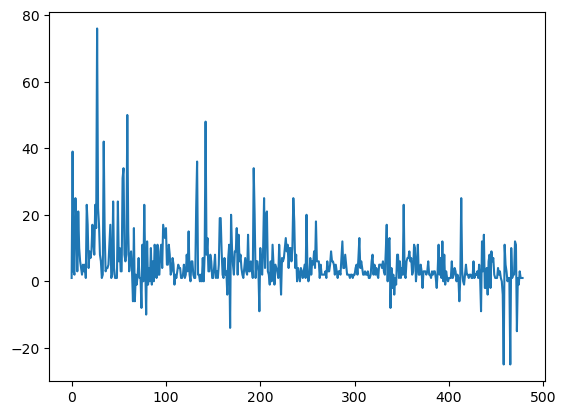

In [96]:
df["Score"].plot();

In [97]:
adfuller(df["Score"])

(-4.477154194045056,
 0.00021620009732447327,
 11,
 467,
 {'1%': -3.4444305322234365,
  '5%': -2.8677488864580885,
  '10%': -2.5700770984781443},
 3200.46646536486)

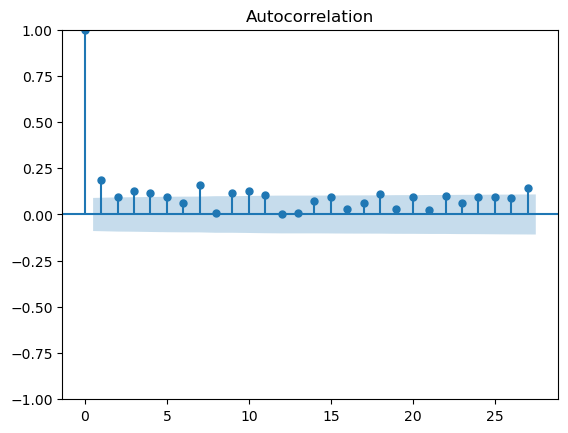

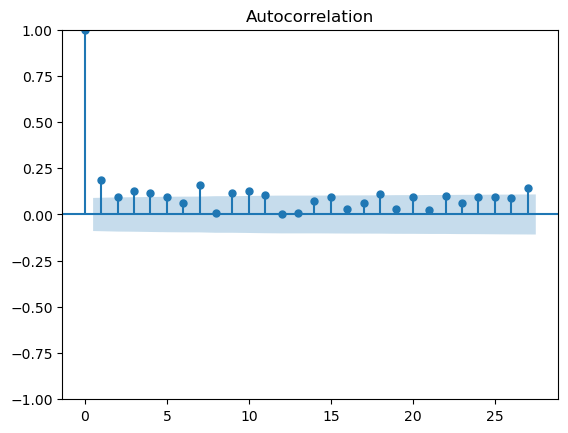

In [98]:
plot_acf(df["Score"])

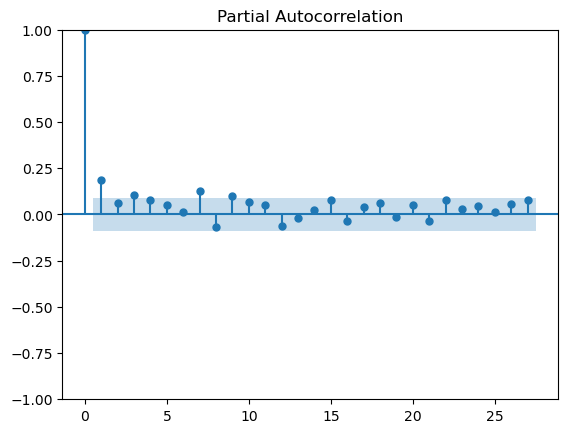

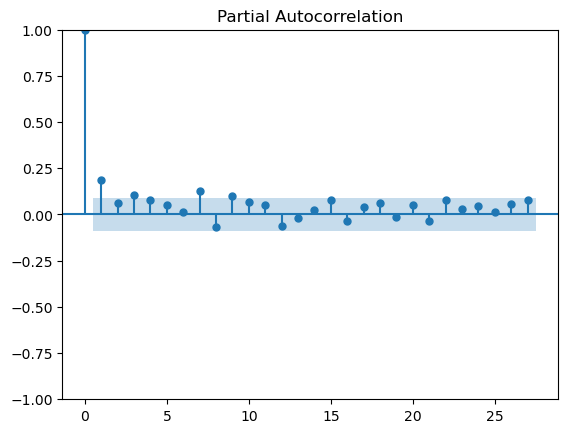

In [99]:
plot_pacf(df["Score"], method='ywm')

In [100]:
aicVals = []
for p in range(5):
    for q in range(5):
        aicVals.append( [   sm.ARIMA( df["Score"], order=(p, 0, q) ).fit().aic, p, q   ] )

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inve

In [101]:
aicVals.sort()

aicVals

[[3345.7007759687767, 3, 4],
 [3347.0963219967316, 3, 3],
 [3347.5907522336142, 2, 2],
 [3348.4671837724236, 1, 2],
 [3348.558644639363, 2, 1],
 [3349.0122509770226, 3, 2],
 [3349.057510765276, 2, 3],
 [3350.0181251098074, 4, 3],
 [3350.126983577823, 1, 1],
 [3350.41114040721, 1, 3],
 [3350.4787462144377, 3, 1],
 [3350.564590962179, 4, 2],
 [3350.6247783620065, 2, 4],
 [3351.693467952835, 4, 4],
 [3351.8316055192527, 4, 1],
 [3351.867902826086, 1, 4],
 [3364.514060070338, 4, 0],
 [3365.348800217611, 3, 0],
 [3368.017098004179, 0, 4],
 [3368.5668201668705, 0, 3],
 [3368.7143265681716, 1, 0],
 [3368.7436553587568, 2, 0],
 [3370.5376420364173, 0, 1],
 [3370.9375173101816, 0, 2],
 [3383.2951687764394, 0, 0]]

In [102]:
model = sm.ARIMA(df["Score"], order=(3, 0 , 4)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  479
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -1663.850
Date:                Thu, 23 Nov 2023   AIC                           3345.701
Time:                        17:50:01   BIC                           3383.246
Sample:                             0   HQIC                          3360.460
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7559      3.106      1.853      0.064      -0.332      11.844
ar.L1         -0.8841      0.041    -21.651      0.000      -0.964      -0.804
ar.L2          0.9354      0.014     67.019      0.000       0.908       0.963
ar.L3          0.9365      0.037     25.354      0.000       0.864       1.009
ma.L1          1.0284      0.058     17.595      0.000       0.914       1.143
ma.L2         -0.7978      0.058    -13.837      0.000      -0.911      -0.685
ma.L3         -0.9977      0.056    -17.805      0.000      -1.108      -0.888
ma.L4         -0.0923      0.048     -1.925      0.054      -0.186       0.002
sigma2        60.6894      2.054     29.543      0.000      56.663      64.716
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4331.60
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             2.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
pred_time = 10
result = model.predict(pred_time)

In [105]:
result

10     11.739766
11      7.043045
12     10.597046
13      6.703863
14      9.778182
         ...    
474     0.628145
475     2.628231
476     1.112053
477     2.311542
478     1.450932
Name: predicted_mean, Length: 469, dtype: float64

In [106]:
import matplotlib.pyplot as plt

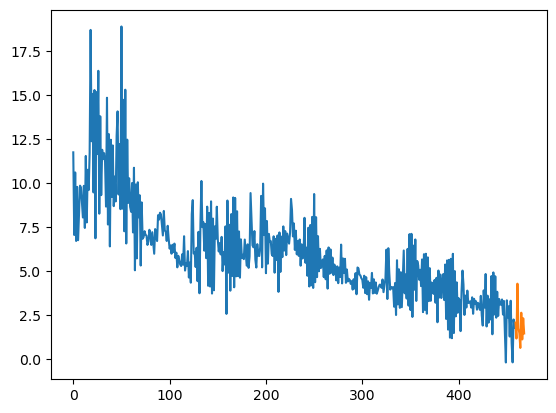

In [107]:
plt.plot(range(len(result)-pred_time), result[:-pred_time])
plt.plot(range(len(result)-pred_time, len(result)), result[-pred_time:])

In [108]:
print("Result values:")
print(result)


Result values:
10     11.739766
11      7.043045
12     10.597046
13      6.703863
14      9.778182
         ...    
474     0.628145
475     2.628231
476     1.112053
477     2.311542
478     1.450932
Name: predicted_mean, Length: 469, dtype: float64


In [ ]:
################################

In [ ]:
# Re-import data

In [110]:
df = pd.read_csv('db2023_cleandf.csv')

In [112]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')



In [ ]:
# Re fit ARMA Model

In [116]:
model = sm.ARIMA(df["Score"], order=(3, 0 , 4)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [117]:
# Set training percentage at 80%
train_percentage = 0.8

split_index = int(len(df) * train_percentage)

# Split the data training/test 
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Extract target column
train_actual_values = train_data['Score']
test_actual_values = test_data['Score']

# Use the trained ARIMA model to make one-step-ahead forecasts on the 'test_data'
test_forecasts = model.predict(start=split_index, end=len(df)-1, dynamic=False)

# Calculate forecast errors
forecast_errors = test_actual_values - test_forecasts

# Print or visualize the forecast errors and evaluate the model's performance
print("Forecast Errors:", forecast_errors)

Forecast Errors: 383   -1.953003
384   -0.699779
385   -1.490353
386   -2.195282
387   -6.611635
         ...   
474   -1.628145
475    0.371769
476   -0.112053
477   -1.311542
478   -0.450932
Length: 96, dtype: float64


In [ ]:
# One Step Ahead Forecasts 

In [151]:
# Working Code

# Set train percentage at 80%
train_percentage = 0.8


split_index = int(len(df) * train_percentage)

# Split the data 
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Extract 'Score' column
train_actual_values = train_data['Score']
test_actual_values = test_data['Score']

# Train ARIMA model
order = (3, 0, 4)
model = sm.tsa.SARIMAX(train_actual_values, order=order).fit(disp=False)

# 10 observations to forecast
num_forecast = 10

# Make one-step-ahead forecasts for the last 'num_forecast' observations
forecast_errors = []
forecast_values = []

for i in range(-num_forecast, 0):
    # Make a one-step-ahead forecast
    forecast_value = model.predict(start=len(df) + i, end=len(df) + i, dynamic=False)
    
    # Get actual value for comparison 
    actual_value = test_actual_values.iloc[i]
    
    # Calculate forecast error
    error = actual_value - forecast_value.iloc[0]  
    
    # Append the error and forecast value to the lists
    forecast_errors.append(error)
    forecast_values.append(forecast_value.iloc[0])

# Print forecast errors
print("Forecast Errors:", forecast_errors)

# Calculate and print error metrics 
mae = np.abs(forecast_errors).mean()
mse = mean_squared_error(test_actual_values.tail(num_forecast), forecast_values)
rmse = np.sqrt(mse)
r2 = r2_score(test_actual_values.tail(num_forecast), forecast_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2);


C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Forecast Errors: [-1.7952318304703692, 8.23892716151135, 7.2104804871914885, -18.75811113630163, -2.783783519533344, -4.755170866304182, -0.7780475333561694, -2.752229910432075, -2.7723321132972556, -2.749269213419724]
Mean Absolute Error (MAE): 5.2593583771817585
Mean Squared Error (MSE): 52.87460750055247
Root Mean Squared Error (RMSE): 7.271492797256453
R-squared (R2): -0.09607395316236444


C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


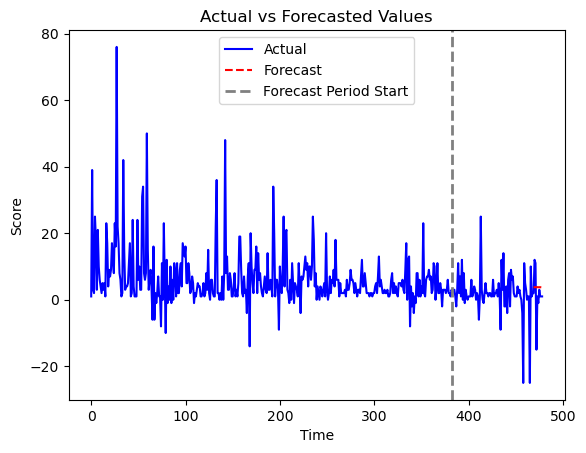

In [130]:
# Visualising our forcasts

# Plot actual values
plt.plot(df.index, df['Score'], label='Actual', color='blue')

# Plot forecasted values
forecast_index = test_data.index[-len(forecast_values):]  # Use the correct index range
plt.plot(forecast_index, forecast_values, label='Forecast', color='red', linestyle='dashed')

# Define our forecast range
plt.axvline(test_data.index[0], color='gray', linestyle='--', linewidth=2, label='Forecast Period Start')


plt.xlabel('Time')
plt.ylabel('Score')
plt.title('Actual vs Forecasted Values')
plt.legend()
plt.show()


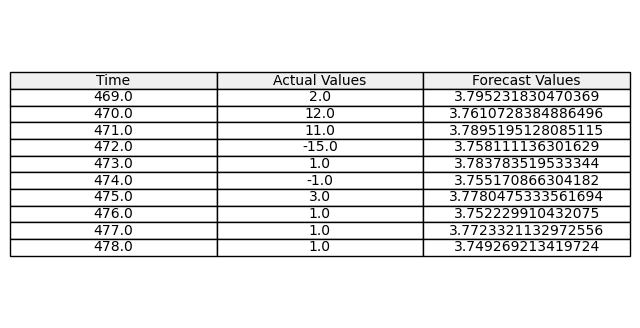

In [138]:
#Plot our results on a table (Time, Actual, Forecast)
table_data = pd.DataFrame({
    'Time': forecast_index[-len(forecast_values):],  
    'Actual Values': test_actual_values.tail(len(forecast_values)),  
    'Forecast Values': forecast_values
})


fig, ax = plt.subplots(figsize=(8, 4))  
ax.axis('off')  # Turn off the axis
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center', colColours=['#f0f0f0']*3)


table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()


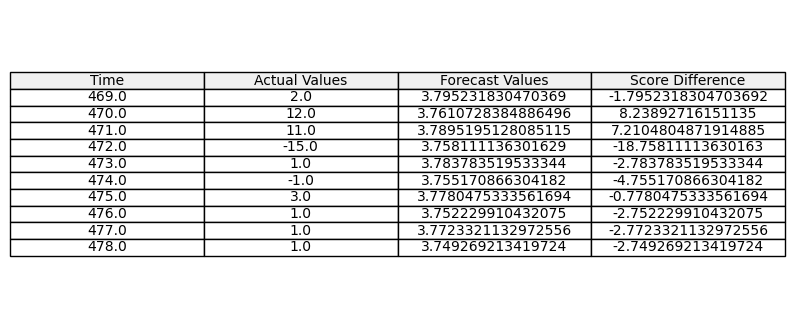

In [144]:
#Plot our results on a table (Time, Actual, Forecast, score diff)

table_data = pd.DataFrame({
    'Time': forecast_index,
    'Actual Values': test_actual_values.loc[forecast_index],
    'Forecast Values': forecast_values,
    'Score Difference': test_actual_values.loc[forecast_index].values - forecast_values,
})


fig, ax = plt.subplots(figsize=(10, 4)) 
ax.axis('off') 


colLabels = table_data.columns

table = ax.table(cellText=table_data.values, colLabels=colLabels, loc='center', cellLoc='center', colColours=['#f0f0f0']*len(colLabels))


table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()


In [150]:
# Print results same as above

# Calculate difference between actual and forecasted values
differences = test_actual_values.tail(len(forecast_values)) - forecast_values

# Print results
print("Time\tActual Values\tForecast Values\tDifferences")
for i in range(len(forecast_index)):
    print(f"{forecast_index[i]}\t{test_actual_values.loc[forecast_index].values[i]:.2f}\t{forecast_values[i]:.4f}\t"
          f"{differences.iloc[i]:.4f}")


Time	Actual Values	Forecast Values	Differences
469	2.00	3.7952	-1.7952
470	12.00	3.7611	8.2389
471	11.00	3.7895	7.2105
472	-15.00	3.7581	-18.7581
473	1.00	3.7838	-2.7838
474	-1.00	3.7552	-4.7552
475	3.00	3.7780	-0.7780
476	1.00	3.7522	-2.7522
477	1.00	3.7723	-2.7723
478	1.00	3.7493	-2.7493
